In [128]:
#https://docs.llamaindex.ai/en/stable/examples/usecases/10q_sub_question/
import nest_asyncio

nest_asyncio.apply()

In [129]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.core.response.pprint_utils import pprint_response
from llama_index.llms.openai import OpenAI

from llama_index.core.tools import QueryEngineTool, ToolMetadata
from llama_index.core.query_engine import SubQuestionQueryEngine

In [130]:
import os
import re

os.environ["OPENAI_API_KEY"] = "sk-proj-Q0eWC0bJfIIaLkIGOaHOT3BlbkFJcAPgSc2VZCGKEPVJVtzI"

In [131]:
from llama_index.core import Settings

# Settings.llm = OpenAI(temperature=0.2, model="gpt-3.5-turbo")
Settings.llm = OpenAI(temperature=0.2, model="gpt-4o")

In [132]:
import os
import glob
import ast

# Define the folder containing the PDF files
data_folder = './data/'

# Use glob to find all PDF files in the folder
pdf_files = glob.glob(os.path.join(data_folder, '*.pdf'))
pdf_files

['./data\\Market Report_02 May 2024.pdf',
 './data\\Market Report_03 May 2024.pdf',
 './data\\Market Report_06 May 2024.pdf',
 './data\\Market Report_07 May 2024.pdf',
 './data\\Market Report_08 May 2024.pdf',
 './data\\Market Report_09 May 2024.pdf',
 './data\\Market Report_10 May 2024.pdf',
 './data\\Market Report_13 May 2024.pdf',
 './data\\Market Report_14 May 2024.pdf',
 './data\\Market Report_15 May 2024.pdf',
 './data\\Market Report_16 May 2024.pdf',
 './data\\Market Report_17 May 2024.pdf',
 './data\\Market Report_20 May 2024.pdf',
 './data\\Market Report_21 May 2024.pdf']

In [133]:
dates = [filename.split('_')[-1].split('.')[0] for filename in pdf_files]
# print(dates)

print(dates)
print(len(dates))

['02 May 2024', '03 May 2024', '06 May 2024', '07 May 2024', '08 May 2024', '09 May 2024', '10 May 2024', '13 May 2024', '14 May 2024', '15 May 2024', '16 May 2024', '17 May 2024', '20 May 2024', '21 May 2024']
14


In [134]:
data_process = [SimpleDirectoryReader(input_files=[xx]).load_data() for xx in pdf_files]

In [135]:
data_index = [VectorStoreIndex.from_documents(data_process[i]) for i in range(len(data_process))]

In [136]:
data_engine= [data_index[i].as_query_engine(similarity_top_k=3) for i in range(len(data_process))]

In [137]:
len(data_process)

14

In [138]:
query_engine_tools = [
    QueryEngineTool(
        query_engine=data_engine[i],
        metadata=ToolMetadata(
            name=dates[i],
            description=(
                "Provides information about stock market on" + dates[i]
            ),
        ),
    ) for i in range(len(data_process))]

In [139]:
s_engine = SubQuestionQueryEngine.from_defaults(
    query_engine_tools=query_engine_tools
)

In [140]:
# response = s_engine.query(
#     "what are the price of crdb shares for all dates"
# )

In [141]:
# print(response)

In [170]:
response1 = s_engine.query(
    "what are the bids price of crdb shares for all dates output only in dict format of {'date':date, 'price':price}"
)

Generated 14 sub questions.
[02 May 2024] Q: What is the bid price of CRDB shares on 02 May 2024?
[03 May 2024] Q: What is the bid price of CRDB shares on 03 May 2024?
[06 May 2024] Q: What is the bid price of CRDB shares on 06 May 2024?
[07 May 2024] Q: What is the bid price of CRDB shares on 07 May 2024?
[08 May 2024] Q: What is the bid price of CRDB shares on 08 May 2024?
[09 May 2024] Q: What is the bid price of CRDB shares on 09 May 2024?
[10 May 2024] Q: What is the bid price of CRDB shares on 10 May 2024?
[13 May 2024] Q: What is the bid price of CRDB shares on 13 May 2024?
[14 May 2024] Q: What is the bid price of CRDB shares on 14 May 2024?
[15 May 2024] Q: What is the bid price of CRDB shares on 15 May 2024?
[16 May 2024] Q: What is the bid price of CRDB shares on 16 May 2024?
[17 May 2024] Q: What is the bid price of CRDB shares on 17 May 2024?
[20 May 2024] Q: What is the bid price of CRDB shares on 20 May 2024?
[21 May 2024] Q: What is the bid price of CRDB shares on 21 Ma

In [171]:
print(response1)

```python
[
    {'date': '02 May 2024', 'price': 550},
    {'date': '03 May 2024', 'price': 550},
    {'date': '06 May 2024', 'price': 550},
    {'date': '07 May 2024', 'price': 550},
    {'date': '08 May 2024', 'price': None},
    {'date': '09 May 2024', 'price': None},
    {'date': '10 May 2024', 'price': None},
    {'date': '13 May 2024', 'price': None},
    {'date': '14 May 2024', 'price': None},
    {'date': '15 May 2024', 'price': None},
    {'date': '16 May 2024', 'price': 480},
    {'date': '17 May 2024', 'price': 490},
    {'date': '20 May 2024', 'price': 480},
    {'date': '21 May 2024', 'price': 480}
]
```


In [176]:
# Extracting the part that contains the list of dictionaries
start_index = response1.response.find("[")
end_index = response1.response.find("]\n```") + 1
data_string = response1.response[start_index:end_index]

# Converting the string representation of the list into an actual list
data_list = ast.literal_eval(data_string)
data_list


[{'date': '02 May 2024', 'price': 550},
 {'date': '03 May 2024', 'price': 550},
 {'date': '06 May 2024', 'price': 550},
 {'date': '07 May 2024', 'price': 550},
 {'date': '08 May 2024', 'price': None},
 {'date': '09 May 2024', 'price': None},
 {'date': '10 May 2024', 'price': None},
 {'date': '13 May 2024', 'price': None},
 {'date': '14 May 2024', 'price': None},
 {'date': '15 May 2024', 'price': None},
 {'date': '16 May 2024', 'price': 480},
 {'date': '17 May 2024', 'price': 490},
 {'date': '20 May 2024', 'price': 480},
 {'date': '21 May 2024', 'price': 480}]

In [177]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [178]:
# load the actual data 
df = pd.read_csv('actual_data_bid.csv')
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
# df

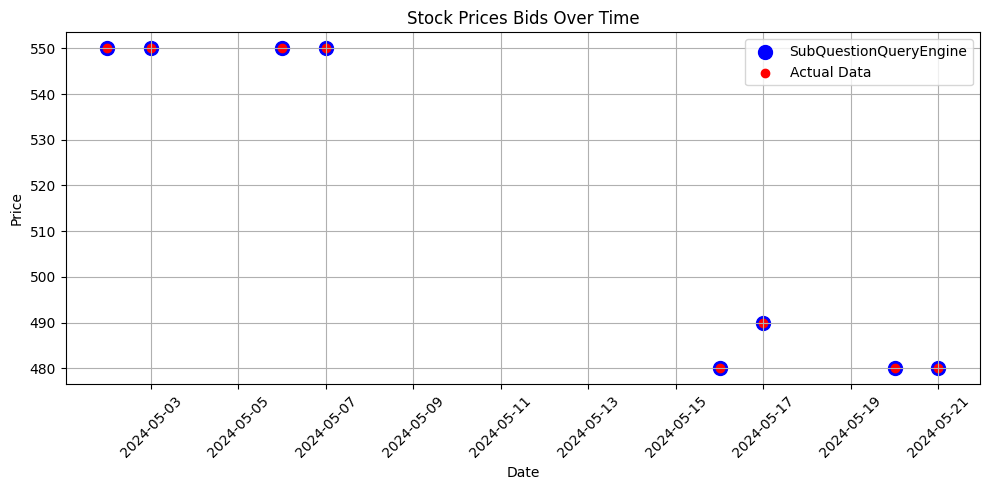

In [181]:
# Extract dates and prices
dates = [datetime.strptime(item['date'], '%d %B %Y') for item in data_list]
prices = [item['price'] for item in data_list]

# Sort data by date
sorted_data = sorted(zip(dates, prices), key=lambda x: x[0])
sorted_dates, sorted_prices = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 5))
scatter1 = plt.scatter(sorted_dates, sorted_prices, color='b', s=100, label='SubQuestionQueryEngine')
scatter2= plt.scatter(df['date'], df['price'], color='r', label='Actual Data')

# Add legend
plt.legend(handles=[scatter1, scatter2])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Bids Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [166]:
response = s_engine.query(
    "what are the offers price of crdb shares for all dates output only in dict format of {'date':date, 'price':price}"
)

Generated 14 sub questions.
[02 May 2024] Q: What is the offer price of CRDB shares on 02 May 2024?
[03 May 2024] Q: What is the offer price of CRDB shares on 03 May 2024?
[06 May 2024] Q: What is the offer price of CRDB shares on 06 May 2024?
[07 May 2024] Q: What is the offer price of CRDB shares on 07 May 2024?
[08 May 2024] Q: What is the offer price of CRDB shares on 08 May 2024?
[09 May 2024] Q: What is the offer price of CRDB shares on 09 May 2024?
[10 May 2024] Q: What is the offer price of CRDB shares on 10 May 2024?
[13 May 2024] Q: What is the offer price of CRDB shares on 13 May 2024?
[14 May 2024] Q: What is the offer price of CRDB shares on 14 May 2024?
[15 May 2024] Q: What is the offer price of CRDB shares on 15 May 2024?
[16 May 2024] Q: What is the offer price of CRDB shares on 16 May 2024?
[17 May 2024] Q: What is the offer price of CRDB shares on 17 May 2024?
[20 May 2024] Q: What is the offer price of CRDB shares on 20 May 2024?
[21 May 2024] Q: What is the offer p

In [182]:
print(response)

```python
[
    {'date': '02 May 2024', 'price': 560},
    {'date': '03 May 2024', 'price': 560},
    {'date': '06 May 2024', 'price': 560},
    {'date': '07 May 2024', 'price': 560},
    {'date': '08 May 2024', 'price': 540},
    {'date': '09 May 2024', 'price': 540},
    {'date': '10 May 2024', 'price': 540},
    {'date': '13 May 2024', 'price': 540},
    {'date': '14 May 2024', 'price': 520},
    {'date': '15 May 2024', 'price': 500},
    {'date': '16 May 2024', 'price': 490},
    {'date': '17 May 2024', 'price': 500},
    {'date': '20 May 2024', 'price': 490},
    {'date': '21 May 2024', 'price': 490}
]
```


In [184]:
# Extracting the part that contains the list of dictionaries
start_index = response.response.find("[")
end_index = response.response.find("]\n```") + 1
data_string = response.response[start_index:end_index]

# Converting the string representation of the list into an actual list
data_list = ast.literal_eval(data_string)
data_list

[{'date': '02 May 2024', 'price': 560},
 {'date': '03 May 2024', 'price': 560},
 {'date': '06 May 2024', 'price': 560},
 {'date': '07 May 2024', 'price': 560},
 {'date': '08 May 2024', 'price': 540},
 {'date': '09 May 2024', 'price': 540},
 {'date': '10 May 2024', 'price': 540},
 {'date': '13 May 2024', 'price': 540},
 {'date': '14 May 2024', 'price': 520},
 {'date': '15 May 2024', 'price': 500},
 {'date': '16 May 2024', 'price': 490},
 {'date': '17 May 2024', 'price': 500},
 {'date': '20 May 2024', 'price': 490},
 {'date': '21 May 2024', 'price': 490}]

In [190]:
# load the actual data 
df = pd.read_csv('actual_data_offer.csv')
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
# df

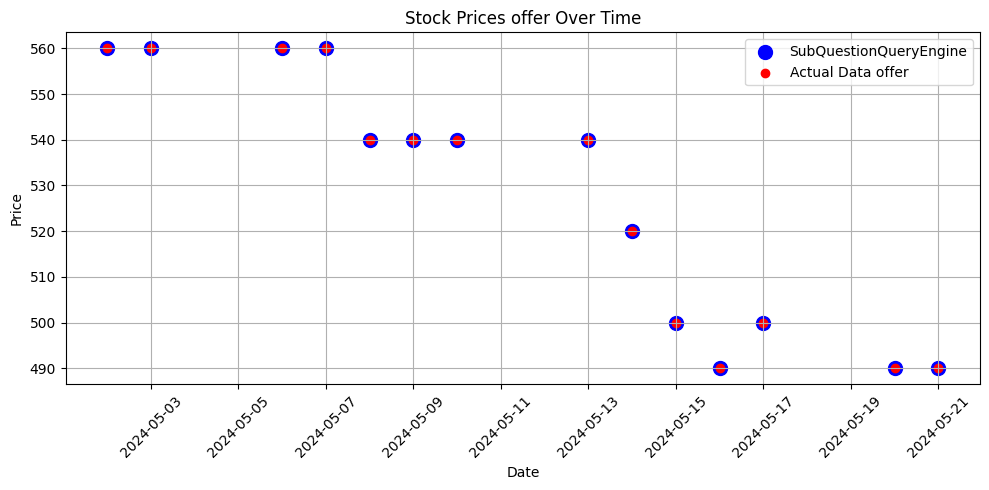

In [189]:
# Extract dates and prices
dates = [datetime.strptime(item['date'], '%d %B %Y') for item in data_list]
prices = [item['price'] for item in data_list]

# Sort data by date
sorted_data = sorted(zip(dates, prices), key=lambda x: x[0])
sorted_dates, sorted_prices = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 5))
scatter1 = plt.scatter(sorted_dates, sorted_prices, color='b', s=100, label='SubQuestionQueryEngine')
scatter2= plt.scatter(df['date'], df['price'], color='r', label='Actual Data offer')

# Add legend
plt.legend(handles=[scatter1, scatter2])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices offer Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()